# Independent Study Week 10 - Data cleaning test (Oct 27, 2021)

## 0. Introduction

**Changes in the external management environment - COVID-19**


After the first confirmed COVID-19 case on January 20, 2020, in Korea, the external management environment has completely changed. Park and Park (2020) argue that ‘tourism-related sectors’ are even more vulnerable to the impact of COVID-19 because of the ‘lower resilience’ nature of the industry. One of the main social distancing measures is discouraging people from contacting each other, but it is inevitable to have contacts between people when it comes to travel. Moreover, international travel restrictions blocked certain people’s entries from certain countries (p.188). Domestic travel is no different.

**New Trends in Tourism Industry in the situation of COVID-19**

Since the lockdown lasts longer than a year, people began to feel tired about the restrictions and social distancing measures. The Bank of Korea (2021) points out that the people who are tired of long isolation have lost their will to follow government regulations. In the situation of COVID-19, people began to find safer ways to travel. Sung et al. (2021) explains the new trend in tourism industry that adopts a new normal environment in which people live with the pandemic. First, travelers visit outdoor tourist attractions because they have to maintain social distance and limit their movement to a minimum. Second, the pandemic paradoxically activates the domestic tourism because borders are closed.

**How we could effectively use data to achieve a marketing plan**

There are two main goals in this study. First is to use data to detect changes in industrial trends. Statistics of Visitors to Major Tourist Attractions provides the number of visitors to more than 4,000 tourist destinations in South Korea, and it is updated quarterly. The data can be used to track tourism trend, such as which regions are gaining popularity. Second, we can use this data to create key performance indicators. We can compare the achievement of tourist destinations with or without marketing resources. Lastly, short-term marketing plans can be changed depending on the results of trend analysis and performance analysis. If we have new market trends and resources to allocate, we can use them for short-term marketing plans.

## 1. Data importing

Using the data of 12 province
- Incheon, Busan, Jeju, Sejong, Seoul, Ulsan
- Gangwon-do, Chungcheongnam-do, Chungcheongbuk-do, Daegu, Daejeon, Gwangju

In [13]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np


import pandas as pd
#pd.options.mode.chained_assignment = None  # default='warn'

In [14]:
data = pd.read_csv('testing14.csv', thousands=',', skiprows=2)
data.head()

,province,district,category,sub_category,label,tourist_spot_kor,tourist_spot_eng,foreigner_local,2012-Jan,2012-Feb,...,2020-Sep,2020-Oct,2020-Nov,2020-Dec,2021-Jan,2021-Feb,2021-Mar,2021-Apr,2021-May,2021-Jun
0,Incheon Metropolitan City,Yeonsu-gu,indoor,facility,museum,�������а�,Gas Science Museum,Foreigner,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,Incheon Metropolitan City,Yeonsu-gu,indoor,facility,museum,�������а�,Gas Science Museum,Local,4303.0,2089.0,...,0.0,4527.0,4590.0,698.0,12.0,89.0,844.0,NaN,NaN,NaN
2,Incheon Metropolitan City,Yeonsu-gu,indoor,facility,museum,�������а�,Gas Science Museum,Total,4303.0,2089.0,...,0.0,4527.0,4590.0,698.0,12.0,89.0,844.0,NaN,NaN,NaN
3,Incheon Metropolitan City,Yeonsu-gu,indoor,facility,museum,��õ�ڹ���,Gachon Museum,Foreigner,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,Incheon Metropolitan City,Yeonsu-gu,indoor,facility,museum,��õ�ڹ���,Gachon Museum,Local,0.0,0.0,...,0.0,229.0,326.0,92.0,0.0,0.0,105.0,NaN,NaN,NaN


**Remove the tourist_spot_kor**

In [15]:
data_no_korean = data.drop(columns='tourist_spot_kor')
data_no_korean.head()

,province,district,category,sub_category,label,tourist_spot_eng,foreigner_local,2012-Jan,2012-Feb,2012-Mar,...,2020-Sep,2020-Oct,2020-Nov,2020-Dec,2021-Jan,2021-Feb,2021-Mar,2021-Apr,2021-May,2021-Jun
0,Incheon Metropolitan City,Yeonsu-gu,indoor,facility,museum,Gas Science Museum,Foreigner,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,Incheon Metropolitan City,Yeonsu-gu,indoor,facility,museum,Gas Science Museum,Local,4303.0,2089.0,567.0,...,0.0,4527.0,4590.0,698.0,12.0,89.0,844.0,NaN,NaN,NaN
2,Incheon Metropolitan City,Yeonsu-gu,indoor,facility,museum,Gas Science Museum,Total,4303.0,2089.0,567.0,...,0.0,4527.0,4590.0,698.0,12.0,89.0,844.0,NaN,NaN,NaN
3,Incheon Metropolitan City,Yeonsu-gu,indoor,facility,museum,Gachon Museum,Foreigner,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,Incheon Metropolitan City,Yeonsu-gu,indoor,facility,museum,Gachon Museum,Local,0.0,0.0,0.0,...,0.0,229.0,326.0,92.0,0.0,0.0,105.0,NaN,NaN,NaN


## 2. Monthly Total by Category

only select the total number of tourists in each spot

In [16]:
data_total = data_no_korean[(data_no_korean.foreigner_local == 'Total')]
data_total.head()

,province,district,category,sub_category,label,tourist_spot_eng,foreigner_local,2012-Jan,2012-Feb,2012-Mar,...,2020-Sep,2020-Oct,2020-Nov,2020-Dec,2021-Jan,2021-Feb,2021-Mar,2021-Apr,2021-May,2021-Jun
2,Incheon Metropolitan City,Yeonsu-gu,indoor,facility,museum,Gas Science Museum,Total,4303.0,2089.0,567.0,...,0.0,4527.0,4590.0,698.0,12.0,89.0,844.0,NaN,NaN,NaN
5,Incheon Metropolitan City,Yeonsu-gu,indoor,facility,museum,Gachon Museum,Total,0.0,0.0,0.0,...,0.0,229.0,326.0,92.0,0.0,0.0,105.0,NaN,NaN,NaN
7,Incheon Metropolitan City,Ganghwa-gun,indoor,facility,cultural_space,Ganghwa Agricultural Culture Center,Total,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
10,Incheon Metropolitan City,Ganghwa-gun,outdoor,experience,experience_facility,Ganghwa Tidalflat Center,Total,454.0,363.0,792.0,...,0.0,60.0,24.0,0.0,0.0,0.0,22.0,NaN,NaN,NaN
13,Incheon Metropolitan City,Ganghwa-gun,outdoor,history_cultural,other_historic_site,Ganghwa Dolmen,Total,7054.0,8730.0,15935.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Select the data from '2016-Jan' to '2021-Jun'

In [17]:
monthly_data_total = data_total[['tourist_spot_eng', 'category', '2016-Jan', '2016-Feb', '2016-Mar', '2016-Apr', '2016-May', '2016-Jun', '2016-Jul', '2016-Aug', '2016-Sep', '2016-Oct', '2016-Nov', '2016-Dec', '2017-Jan', '2017-Feb', '2017-Mar', '2017-Apr', '2017-May', '2017-Jun', '2017-Jul', '2017-Aug', '2017-Sep', '2017-Oct', '2017-Nov', '2017-Dec', '2018-Jan', '2018-Feb', '2018-Mar', '2018-Apr', '2018-May', '2018-Jun', '2018-Jul', '2018-Aug', '2018-Sep', '2018-Oct', '2018-Nov', '2018-Dec', '2019-Jan', '2019-Feb', '2019-Mar', '2019-Apr', '2019-May', '2019-Jun', '2019-Jul', '2019-Aug', '2019-Sep', '2019-Oct', '2019-Nov', '2019-Dec', '2020-Jan', '2020-Feb', '2020-Mar', '2020-Apr', '2020-May', '2020-Jun', '2020-Jul', '2020-Aug', '2020-Sep', '2020-Oct', '2020-Nov', '2020-Dec', '2021-Jan', '2021-Feb', '2021-Mar', '2021-Apr', '2021-May', '2021-Jun']]
monthly_data_total.head()

,tourist_spot_eng,category,2016-Jan,2016-Feb,2016-Mar,2016-Apr,2016-May,2016-Jun,2016-Jul,2016-Aug,...,2020-Sep,2020-Oct,2020-Nov,2020-Dec,2021-Jan,2021-Feb,2021-Mar,2021-Apr,2021-May,2021-Jun
2,Gas Science Museum,indoor,4942.0,2149.0,1597.0,6657.0,7620.0,8410.0,8227.0,5728.0,...,0.0,4527.0,4590.0,698.0,12.0,89.0,844.0,NaN,NaN,NaN
5,Gachon Museum,indoor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,229.0,326.0,92.0,0.0,0.0,105.0,NaN,NaN,NaN
7,Ganghwa Agricultural Culture Center,indoor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
10,Ganghwa Tidalflat Center,outdoor,NaN,NaN,NaN,NaN,NaN,NaN,887.0,1098.0,...,0.0,60.0,24.0,0.0,0.0,0.0,22.0,NaN,NaN,NaN
13,Ganghwa Dolmen,outdoor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
monthly_data_total_agg = monthly_data_total.groupby('category').agg('sum')
monthly_data_total_agg

,2016-Jan,2016-Feb,2016-Mar,2016-Apr,2016-May,2016-Jun,2016-Jul,2016-Aug,2016-Sep,2016-Oct,...,2020-Sep,2020-Oct,2020-Nov,2020-Dec,2021-Jan,2021-Feb,2021-Mar,2021-Apr,2021-May,2021-Jun
category,,,,,,,,,,,,,,,,,,,,,
indoor,3611836.0,3111670.0,2875530.0,4361509.0,5273816.0,4267568.0,4305108.0,5600787.0,4459242.0,5574461.0,...,1017866.0,2745270.0,2529739.0,1067571.0,599847.0,1029965.0,1122889.0,514062.0,694305.0,546000.0
outdoor,6858198.0,5717366.0,6098039.0,9759207.0,11983239.0,8774604.0,8897198.0,10659482.0,9127339.0,12970489.0,...,6088612.0,11199477.0,8197016.0,4377163.0,2019421.0,3013258.0,3129554.0,2089673.0,2595934.0,1952427.0


In [19]:
monthly_data_total_agg_trans = monthly_data_total_agg.transpose()
monthly_data_total_agg_trans

category,indoor,outdoor
2016-Jan,3611836.0,6858198.0
2016-Feb,3111670.0,5717366.0
2016-Mar,2875530.0,6098039.0
2016-Apr,4361509.0,9759207.0
2016-May,5273816.0,11983239.0
...,...,...
2021-Feb,1029965.0,3013258.0
2021-Mar,1122889.0,3129554.0
2021-Apr,514062.0,2089673.0
2021-May,694305.0,2595934.0


In [20]:
monthly_data_total_agg_trans.index = pd.to_datetime(monthly_data_total_agg_trans.index)

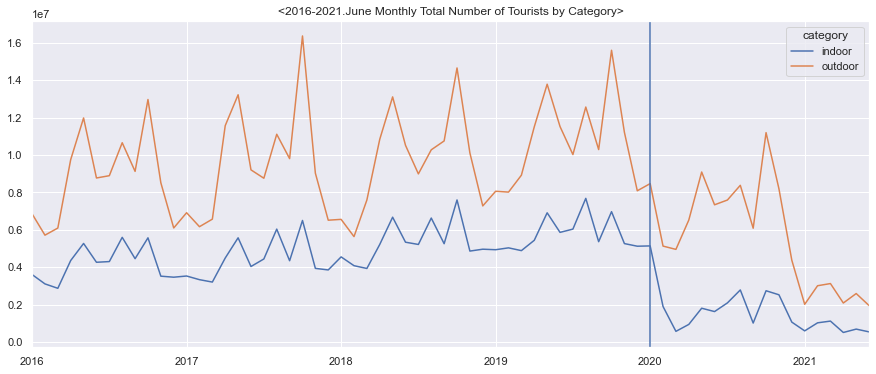

In [21]:
ax = monthly_data_total_agg_trans.plot(figsize = (15,6), kind='line', title='<2016-2021.June Monthly Total Number of Tourists by Category>')
ax.axvline(x='2020-Jan', label='COVID-19');

**Making a plot using seaborn**

In [22]:
sns_monthly_data_total_agg_trans = monthly_data_total_agg.transpose()

sns_monthly_data_total_agg_trans.reset_index(inplace=True)
sns_monthly_data_total_agg_trans

category,index,indoor,outdoor
0,2016-Jan,3611836.0,6858198.0
1,2016-Feb,3111670.0,5717366.0
2,2016-Mar,2875530.0,6098039.0
3,2016-Apr,4361509.0,9759207.0
4,2016-May,5273816.0,11983239.0
...,...,...,...
61,2021-Feb,1029965.0,3013258.0
62,2021-Mar,1122889.0,3129554.0
63,2021-Apr,514062.0,2089673.0
64,2021-May,694305.0,2595934.0


In [23]:
sns_monthly_data_total_agg_trans_melt = sns_monthly_data_total_agg_trans.melt(id_vars=['index'])
sns_monthly_data_total_agg_trans_melt

,index,category,value
0,2016-Jan,indoor,3611836.0
1,2016-Feb,indoor,3111670.0
2,2016-Mar,indoor,2875530.0
3,2016-Apr,indoor,4361509.0
4,2016-May,indoor,5273816.0
...,...,...,...
127,2021-Feb,outdoor,3013258.0
128,2021-Mar,outdoor,3129554.0
129,2021-Apr,outdoor,2089673.0
130,2021-May,outdoor,2595934.0


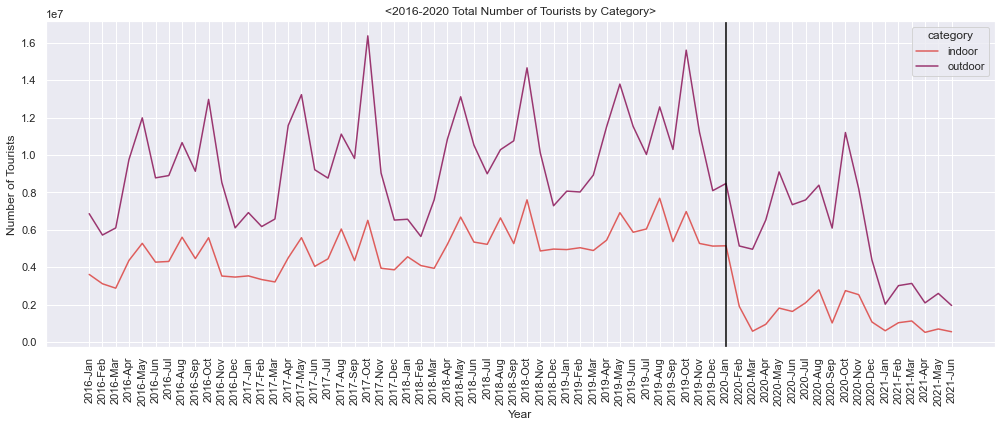

In [24]:
sns.set(rc={'figure.figsize':(17,6)})
ax = sns.lineplot(data = sns_monthly_data_total_agg_trans_melt, x='index', y='value', hue='category', palette="flare")
ax.set(xlabel='Year', ylabel='Number of Tourists', title='<2016-2020 Total Number of Tourists by Category>')
ax.tick_params(axis='x', rotation=90)
plt.axvline('2020-Jan', color='black');

- It clearly shows a significant decline in tourists in both outdoor and indoor tourist spots after the first confirmed COVID-19 case in January 2020.

## 3. Analysis by Sub_Category

### 3-1. 2016-2020 Yearly Total by sub_category

Make 'sum' columns from 2016 to 2020.

In [25]:
data_total['2016'] = data_total['2016-Jan'].values + data_total['2016-Feb'].values + data_total['2016-Mar'].values + data_total['2016-Apr'].values + data_total['2016-May'].values + data_total['2016-Jun'].values + data_total['2016-Jul'].values + data_total['2016-Aug'].values + data_total['2016-Sep'].values + data_total['2016-Oct'].values + data_total['2016-Nov'].values + data_total['2016-Dec'].values
data_total['2017'] = data_total['2017-Jan'].values + data_total['2017-Feb'].values + data_total['2017-Mar'].values + data_total['2017-Apr'].values + data_total['2017-May'].values + data_total['2017-Jun'].values + data_total['2017-Jul'].values + data_total['2017-Aug'].values + data_total['2017-Sep'].values + data_total['2017-Oct'].values + data_total['2017-Nov'].values + data_total['2017-Dec'].values
data_total['2018'] = data_total['2018-Jan'].values + data_total['2018-Feb'].values + data_total['2018-Mar'].values + data_total['2018-Apr'].values + data_total['2018-May'].values + data_total['2018-Jun'].values + data_total['2018-Jul'].values + data_total['2018-Aug'].values + data_total['2018-Sep'].values + data_total['2018-Oct'].values + data_total['2018-Nov'].values + data_total['2018-Dec'].values
data_total['2019'] = data_total['2019-Jan'].values + data_total['2019-Feb'].values + data_total['2019-Mar'].values + data_total['2019-Apr'].values + data_total['2019-May'].values + data_total['2019-Jun'].values + data_total['2019-Jul'].values + data_total['2019-Aug'].values + data_total['2019-Sep'].values + data_total['2019-Oct'].values + data_total['2019-Nov'].values + data_total['2019-Dec'].values
data_total['2020'] = data_total['2020-Jan'].values + data_total['2020-Feb'].values + data_total['2020-Mar'].values + data_total['2020-Apr'].values + data_total['2020-May'].values + data_total['2020-Jun'].values + data_total['2020-Jul'].values + data_total['2020-Aug'].values + data_total['2020-Sep'].values + data_total['2020-Oct'].values + data_total['2020-Nov'].values + data_total['2020-Dec'].values
data_total.head()

C:\Users\HAESOOK MA\anaconda3\envs\DataViz\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\HAESOOK MA\anaconda3\envs\DataViz\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\HAESOOK MA\anaconda3\envs\DataViz\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

,province,district,category,sub_category,label,tourist_spot_eng,foreigner_local,2012-Jan,2012-Feb,2012-Mar,...,2021-Feb,2021-Mar,2021-Apr,2021-May,2021-Jun,2016,2017,2018,2019,2020
2,Incheon Metropolitan City,Yeonsu-gu,indoor,facility,museum,Gas Science Museum,Total,4303.0,2089.0,567.0,...,89.0,844.0,NaN,NaN,NaN,70758.0,59480.0,71013.0,70651.0,13823.0
5,Incheon Metropolitan City,Yeonsu-gu,indoor,facility,museum,Gachon Museum,Total,0.0,0.0,0.0,...,0.0,105.0,NaN,NaN,NaN,NaN,NaN,13235.0,12642.0,1923.0
7,Incheon Metropolitan City,Ganghwa-gun,indoor,facility,cultural_space,Ganghwa Agricultural Culture Center,Total,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,15446.0,36383.0,4051.0
10,Incheon Metropolitan City,Ganghwa-gun,outdoor,experience,experience_facility,Ganghwa Tidalflat Center,Total,454.0,363.0,792.0,...,0.0,22.0,NaN,NaN,NaN,NaN,4988.0,4632.0,3322.0,274.0
13,Incheon Metropolitan City,Ganghwa-gun,outdoor,history_cultural,other_historic_site,Ganghwa Dolmen,Total,7054.0,8730.0,15935.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
sub_data_total = data_total[['tourist_spot_eng', 'sub_category', '2016', '2017', '2018', '2019', '2020']].sort_values('2020', ascending=False)
sub_data_total.head(20)

,tourist_spot_eng,sub_category,2016,2017,2018,2019,2020
2579,Dodamsambong Peaks,nature,3069339.0,4056357.0,3571998.0,4659543.0,2690225.0
849,Daegu Arboretum,nature,1844215.0,1593641.0,1600036.0,1599947.0,2083074.0
519,National Museum of Korea,facility,3396259.0,3476606.0,3304453.0,3354089.0,1738008.0
545,Lotte World,experience,NaN,NaN,5692646.0,5786118.0,1557802.0
3398,Ganworam Hermitage,history_cultural,NaN,NaN,NaN,NaN,1406616.0
944,Kyeryongsan sutonggol District National Park,nature,556969.0,971521.0,951455.0,962840.0,1325781.0
1596,Seoraksan National Park (Seorak-dong),nature,2269380.0,2452020.0,2285499.0,2051739.0,1312726.0
936,Jangtaesan Natural Recreation Forest,nature,NaN,860681.0,839750.0,959736.0,1189790.0
234,Gamcheon Culture Village,experience,1841323.0,2050297.0,2570521.0,3082289.0,1133300.0
2382,Naksansa Temple,history_cultural,1058047.0,1329234.0,1222405.0,1243423.0,1045834.0


In [27]:
sub_data_total_agg = sub_data_total.groupby('sub_category').agg('sum')
sub_data_total_agg

,2016,2017,2018,2019,2020
sub_category,,,,,
accommodation,721202.0,716674.0,1385967.0,1334971.0,369063.0
etc,2295498.0,2666993.0,2041984.0,2357211.0,2292248.0
experience,52236541.0,55233273.0,67658507.0,75600717.0,40406375.0
facility,32227170.0,33546211.0,36751016.0,38033527.0,11534300.0
history_cultural,21673429.0,23528647.0,21865255.0,24326234.0,14500621.0
nature,43966863.0,49795636.0,48344791.0,52073692.0,41349455.0


In [28]:
sub_data_total_agg_trans = sub_data_total_agg.transpose()
sub_data_total_agg_trans

sub_category,accommodation,etc,experience,facility,history_cultural,nature
2016,721202.0,2295498.0,52236541.0,32227170.0,21673429.0,43966863.0
2017,716674.0,2666993.0,55233273.0,33546211.0,23528647.0,49795636.0
2018,1385967.0,2041984.0,67658507.0,36751016.0,21865255.0,48344791.0
2019,1334971.0,2357211.0,75600717.0,38033527.0,24326234.0,52073692.0
2020,369063.0,2292248.0,40406375.0,11534300.0,14500621.0,41349455.0


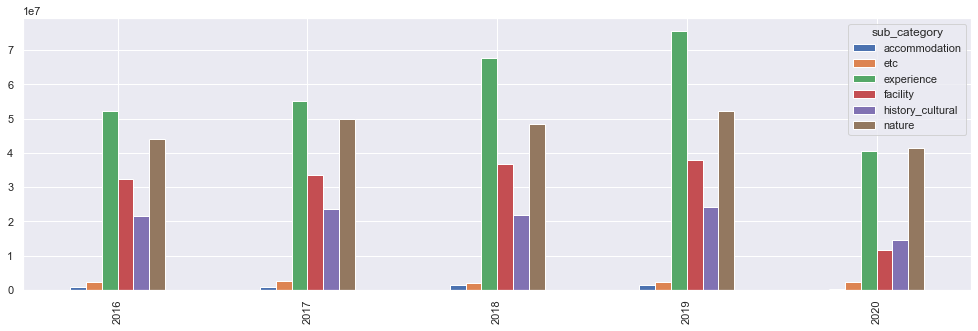

In [29]:
sub_data_total_agg_trans.plot(figsize = (17,5), kind='bar');

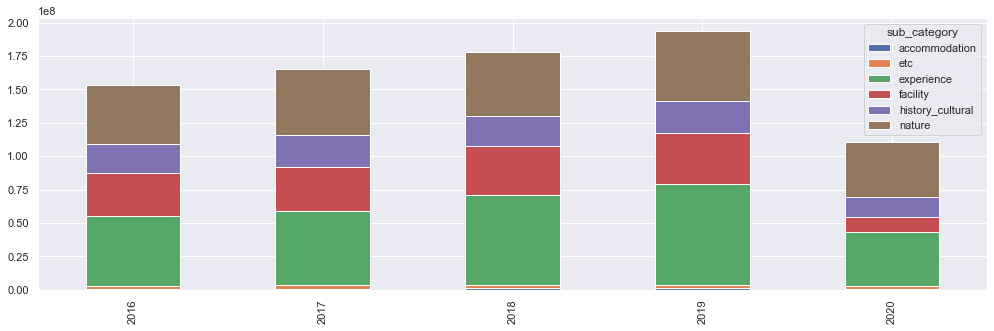

In [30]:
sub_data_total_agg_trans.plot(figsize = (17,5), kind='bar',stacked = True);

In [31]:
sub_data_total_agg_trans.reset_index(inplace=True)
sub_data_total_agg_trans

sub_category,index,accommodation,etc,experience,facility,history_cultural,nature
0,2016,721202.0,2295498.0,52236541.0,32227170.0,21673429.0,43966863.0
1,2017,716674.0,2666993.0,55233273.0,33546211.0,23528647.0,49795636.0
2,2018,1385967.0,2041984.0,67658507.0,36751016.0,21865255.0,48344791.0
3,2019,1334971.0,2357211.0,75600717.0,38033527.0,24326234.0,52073692.0
4,2020,369063.0,2292248.0,40406375.0,11534300.0,14500621.0,41349455.0


In [32]:
sub_data_total_agg_trans_melt = sub_data_total_agg_trans.melt(id_vars=['index'])
sub_data_total_agg_trans_melt.head()

,index,sub_category,value
0,2016,accommodation,721202.0
1,2017,accommodation,716674.0
2,2018,accommodation,1385967.0
3,2019,accommodation,1334971.0
4,2020,accommodation,369063.0


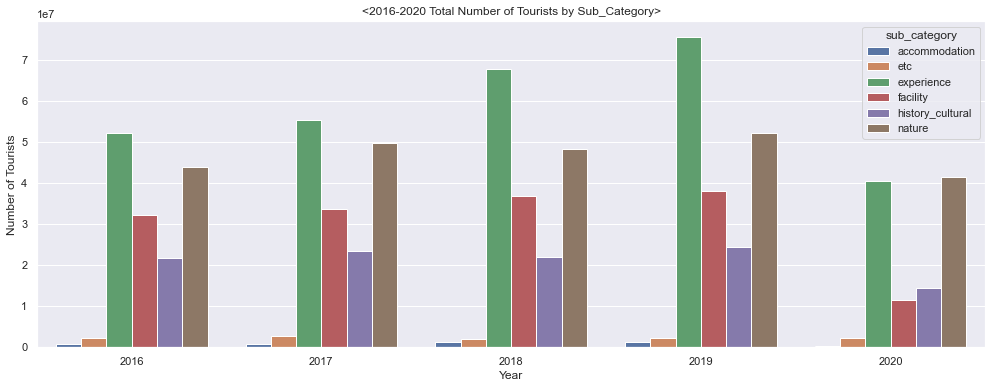

In [33]:
sns.set(rc={'figure.figsize':(17,6)})
ax = sns.barplot(data = sub_data_total_agg_trans_melt, x='index', y='value', hue='sub_category')
ax.set(xlabel='Year', ylabel='Number of Tourists', title='<2016-2020 Total Number of Tourists by Sub_Category>');

### 3-2. 2016-2020 Proportion by sub_category

In [34]:
sub_data_total_agg_trans.set_index('index', inplace=True)

In [35]:
sub_data_total_agg_trans

sub_category,accommodation,etc,experience,facility,history_cultural,nature
index,,,,,,
2016,721202.0,2295498.0,52236541.0,32227170.0,21673429.0,43966863.0
2017,716674.0,2666993.0,55233273.0,33546211.0,23528647.0,49795636.0
2018,1385967.0,2041984.0,67658507.0,36751016.0,21865255.0,48344791.0
2019,1334971.0,2357211.0,75600717.0,38033527.0,24326234.0,52073692.0
2020,369063.0,2292248.0,40406375.0,11534300.0,14500621.0,41349455.0


In [36]:
sub_data_total_agg_trans_stacked = sub_data_total_agg_trans.div(sub_data_total_agg_trans.sum(1), axis=0)
sub_data_total_agg_trans_stacked

sub_category,accommodation,etc,experience,facility,history_cultural,nature
index,,,,,,
2016,0.004710,0.014991,0.341146,0.210469,0.141545,0.287139
2017,0.004331,0.016116,0.333761,0.202712,0.142178,0.300903
2018,0.007784,0.011469,0.380003,0.206411,0.122806,0.271527
2019,0.006891,0.012168,0.390245,0.196326,0.125570,0.268800
2020,0.003341,0.020753,0.365827,0.104428,0.131284,0.374366


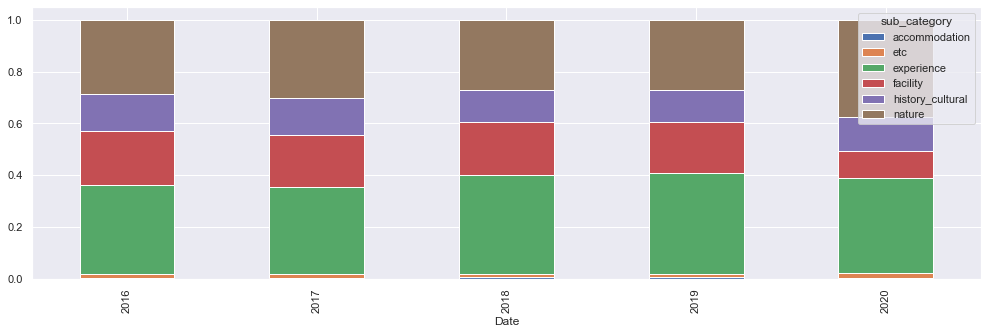

In [37]:
fig, ax = plt.subplots(1,1)

#sub_data_total_agg_trans_stacked.plot(kind='line', y='nature', ax=ax)
sub_data_total_agg_trans_stacked.plot(figsize=(17,5), kind='bar', stacked=True, xlabel='Date', ax=ax);

### 3-3. 2016-2020 Proportion by sub_category (experience label)

In [38]:
sub_data_exp_total = data_total[['tourist_spot_eng', 'sub_category','label', '2016', '2017', '2018', '2019', '2020']].sort_values('2020', ascending=False)
sub_data_exp_total.head(20)

,tourist_spot_eng,sub_category,label,2016,2017,2018,2019,2020
2579,Dodamsambong Peaks,nature,mountain,3069339.0,4056357.0,3571998.0,4659543.0,2690225.0
849,Daegu Arboretum,nature,arboretum,1844215.0,1593641.0,1600036.0,1599947.0,2083074.0
519,National Museum of Korea,facility,museum,3396259.0,3476606.0,3304453.0,3354089.0,1738008.0
545,Lotte World,experience,theme_park,NaN,NaN,5692646.0,5786118.0,1557802.0
3398,Ganworam Hermitage,history_cultural,buddhism,NaN,NaN,NaN,NaN,1406616.0
944,Kyeryongsan sutonggol District National Park,nature,mountain,556969.0,971521.0,951455.0,962840.0,1325781.0
1596,Seoraksan National Park (Seorak-dong),nature,mountain,2269380.0,2452020.0,2285499.0,2051739.0,1312726.0
936,Jangtaesan Natural Recreation Forest,nature,recreational_forest,NaN,860681.0,839750.0,959736.0,1189790.0
234,Gamcheon Culture Village,experience,village_experience,1841323.0,2050297.0,2570521.0,3082289.0,1133300.0
2382,Naksansa Temple,history_cultural,buddhism,1058047.0,1329234.0,1222405.0,1243423.0,1045834.0


In [39]:
sub_data_exp_total2 = sub_data_exp_total[sub_data_exp_total.sub_category=='experience']
sub_data_exp_total2

,tourist_spot_eng,sub_category,label,2016,2017,2018,2019,2020
545,Lotte World,experience,theme_park,NaN,NaN,5692646.0,5786118.0,1557802.0
234,Gamcheon Culture Village,experience,village_experience,1841323.0,2050297.0,2570521.0,3082289.0,1133300.0
1153,Namiseom Island Recreation Area,experience,amusement_park,3279929.0,2837581.0,2808819.0,2765111.0,972522.0
1627,Abai Village,experience,village_experience,438366.0,545543.0,1007480.0,1120965.0,960477.0
510,Namsangol Hanok Village,experience,village_experience,1282840.0,1163995.0,1431737.0,1479195.0,793341.0
...,...,...,...,...,...,...,...,...
4120,Cheonan Recreation Tourist Site,experience,tourist_culture_complex,NaN,NaN,NaN,NaN,NaN
4179,Taejo Mountain Tourist Site,experience,tourist_culture_complex,NaN,NaN,NaN,NaN,NaN
4191,Reptile Insect Experience Center,experience,experience_facility,NaN,NaN,NaN,NaN,NaN
4235,Herb Paradise,experience,experience_facility,NaN,NaN,NaN,NaN,NaN


In [40]:
sub_data_exp_total2_agg = sub_data_exp_total2.groupby('label').agg('sum')
sub_data_exp_total2_agg

,2016,2017,2018,2019,2020
label,,,,,
amusement_park,3279929.0,2837581.0,2808819.0,2765111.0,972522.0
botanical_garden,476204.0,548800.0,997715.0,1174508.0,625101.0
camping,341627.0,583254.0,639664.0,605422.0,525015.0
cruise,1431223.0,1446101.0,1198555.0,1253031.0,280854.0
cultural_space,0.0,36691.0,39510.0,21096.0,10044.0
experience_facility,10414990.0,11561268.0,12887339.0,15701935.0,6634292.0
farm,1331937.0,1272480.0,1348284.0,1377554.0,1223898.0
filming_set,0.0,0.0,122839.0,69489.0,24420.0
filming_studio,0.0,0.0,0.0,0.0,0.0


In [41]:
sub_data_exp_total2_agg_trans = sub_data_exp_total2_agg.transpose()
sub_data_exp_total2_agg_trans

label,amusement_park,botanical_garden,camping,cruise,cultural_space,experience_facility,farm,filming_set,filming_studio,hot_spring,leisure_sport,observatory,rail_bike,street,theme_park,tourist_culture_complex,village_experience,walking_experience,zoo
2016,3279929.0,476204.0,341627.0,1431223.0,0.0,10414990.0,1331937.0,0.0,0.0,4072526.0,6504632.0,1021857.0,1480200.0,1000329.0,9092487.0,2528656.0,6150001.0,2800861.0,309082.0
2017,2837581.0,548800.0,583254.0,1446101.0,36691.0,11561268.0,1272480.0,0.0,0.0,4442516.0,7716943.0,1383130.0,1553577.0,1460026.0,9030656.0,2607412.0,6093462.0,2427632.0,231744.0
2018,2808819.0,997715.0,639664.0,1198555.0,39510.0,12887339.0,1348284.0,122839.0,0.0,4461910.0,8370662.0,2023011.0,1454409.0,1515308.0,17198875.0,2245151.0,7405884.0,2691251.0,249321.0
2019,2765111.0,1174508.0,605422.0,1253031.0,21096.0,15701935.0,1377554.0,69489.0,0.0,4465565.0,8082626.0,2264471.0,1771434.0,1400788.0,18162469.0,2314216.0,8385939.0,5521187.0,263876.0
2020,972522.0,625101.0,525015.0,280854.0,10044.0,6634292.0,1223898.0,24420.0,0.0,2187649.0,7502066.0,1385173.0,976775.0,711589.0,6168682.0,1723627.0,4811213.0,4547258.0,96197.0


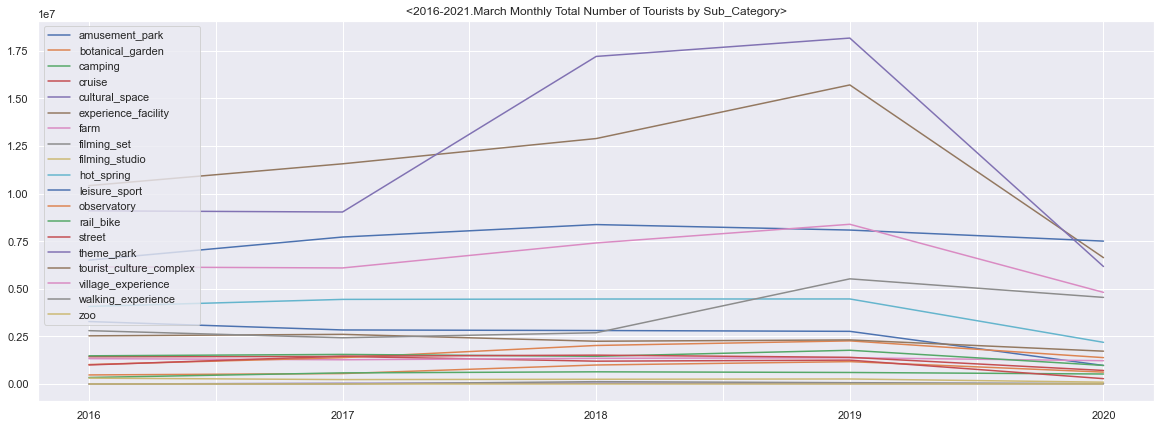

In [42]:
sub_data_exp_total2_agg_trans.plot(figsize = (20,7), kind='line', title='<2016-2021.March Monthly Total Number of Tourists by Sub_Category>')
plt.legend(loc='upper left');

In [43]:
sub_data_exp_total2_agg_trans_stacked = sub_data_exp_total2_agg_trans.div(sub_data_exp_total2_agg_trans.sum(1), axis=0)
sub_data_exp_total2_agg_trans_stacked

label,amusement_park,botanical_garden,camping,cruise,cultural_space,experience_facility,farm,filming_set,filming_studio,hot_spring,leisure_sport,observatory,rail_bike,street,theme_park,tourist_culture_complex,village_experience,walking_experience,zoo
2016,0.062790,0.009116,0.006540,0.027399,0.000000,0.199381,0.025498,0.000000,0.0,0.077963,0.124523,0.019562,0.028336,0.019150,0.174064,0.048408,0.117734,0.053619,0.005917
2017,0.051374,0.009936,0.010560,0.026182,0.000664,0.209317,0.023038,0.000000,0.0,0.080432,0.139715,0.025042,0.028128,0.026434,0.163500,0.047207,0.110322,0.043952,0.004196
2018,0.041515,0.014746,0.009454,0.017715,0.000584,0.190476,0.019928,0.001816,0.0,0.065948,0.123719,0.029900,0.021496,0.022396,0.254201,0.033184,0.109460,0.039777,0.003685
2019,0.036575,0.015536,0.008008,0.016574,0.000279,0.207696,0.018221,0.000919,0.0,0.059068,0.106912,0.029953,0.023431,0.018529,0.240242,0.030611,0.110924,0.073031,0.003490
2020,0.024069,0.015470,0.012993,0.006951,0.000249,0.164189,0.030290,0.000604,0.0,0.054141,0.185665,0.034281,0.024174,0.017611,0.152666,0.042657,0.119071,0.112538,0.002381


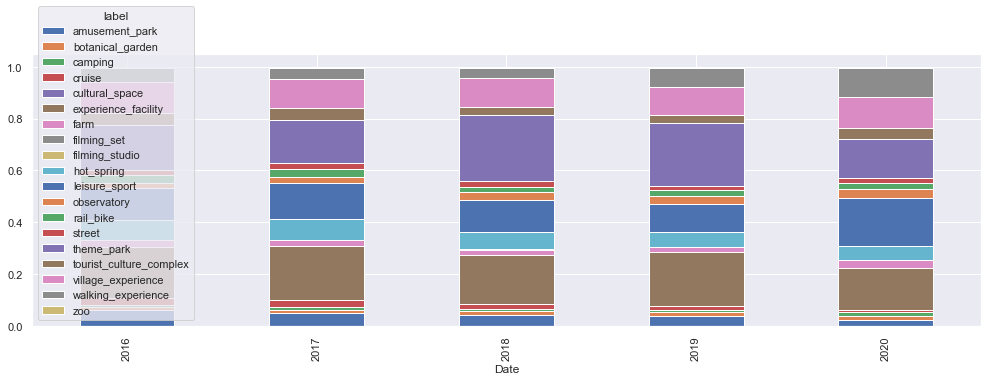

In [44]:
fig, ax = plt.subplots(1,1)
sub_data_exp_total2_agg_trans_stacked.plot(figsize=(17,5), kind='bar', stacked=True, xlabel='Date', ax=ax);

### 3-3. 2016-2020 Proportion by sub_category (experience label) - dividing outdoor and indoor

outdoor

In [45]:
sub_data_cat_exp_total = data_total[['tourist_spot_eng', 'category', 'sub_category','label', '2016', '2017', '2018', '2019', '2020']].sort_values('2020', ascending=False)
sub_data_cat_exp_total.head(20)

,tourist_spot_eng,category,sub_category,label,2016,2017,2018,2019,2020
2579,Dodamsambong Peaks,outdoor,nature,mountain,3069339.0,4056357.0,3571998.0,4659543.0,2690225.0
849,Daegu Arboretum,outdoor,nature,arboretum,1844215.0,1593641.0,1600036.0,1599947.0,2083074.0
519,National Museum of Korea,indoor,facility,museum,3396259.0,3476606.0,3304453.0,3354089.0,1738008.0
545,Lotte World,indoor,experience,theme_park,NaN,NaN,5692646.0,5786118.0,1557802.0
3398,Ganworam Hermitage,outdoor,history_cultural,buddhism,NaN,NaN,NaN,NaN,1406616.0
944,Kyeryongsan sutonggol District National Park,outdoor,nature,mountain,556969.0,971521.0,951455.0,962840.0,1325781.0
1596,Seoraksan National Park (Seorak-dong),outdoor,nature,mountain,2269380.0,2452020.0,2285499.0,2051739.0,1312726.0
936,Jangtaesan Natural Recreation Forest,outdoor,nature,recreational_forest,NaN,860681.0,839750.0,959736.0,1189790.0
234,Gamcheon Culture Village,outdoor,experience,village_experience,1841323.0,2050297.0,2570521.0,3082289.0,1133300.0
2382,Naksansa Temple,outdoor,history_cultural,buddhism,1058047.0,1329234.0,1222405.0,1243423.0,1045834.0


In [46]:
sub_data_cat_exp_total_outdoor = sub_data_cat_exp_total[sub_data_cat_exp_total.category=='outdoor']
sub_data_cat_exp_total_outdoor

,tourist_spot_eng,category,sub_category,label,2016,2017,2018,2019,2020
2579,Dodamsambong Peaks,outdoor,nature,mountain,3069339.0,4056357.0,3571998.0,4659543.0,2690225.0
849,Daegu Arboretum,outdoor,nature,arboretum,1844215.0,1593641.0,1600036.0,1599947.0,2083074.0
3398,Ganworam Hermitage,outdoor,history_cultural,buddhism,NaN,NaN,NaN,NaN,1406616.0
944,Kyeryongsan sutonggol District National Park,outdoor,nature,mountain,556969.0,971521.0,951455.0,962840.0,1325781.0
1596,Seoraksan National Park (Seorak-dong),outdoor,nature,mountain,2269380.0,2452020.0,2285499.0,2051739.0,1312726.0
...,...,...,...,...,...,...,...,...,...
4222,Hamsang Park,outdoor,nature,park,NaN,NaN,NaN,NaN,NaN
4230,"Haemieupseong Fortress, Martyrs' Site",outdoor,history_cultural,other_historic_site,NaN,NaN,NaN,NaN,NaN
4235,Herb Paradise,outdoor,experience,experience_facility,NaN,NaN,NaN,NaN,NaN
4249,Hongjuseong Millennium Travel Road,outdoor,experience,walking_experience,NaN,NaN,NaN,NaN,NaN


In [47]:
sub_data_cat_exp_total_outdoor2 = sub_data_cat_exp_total_outdoor[sub_data_cat_exp_total_outdoor.sub_category=='experience']
sub_data_cat_exp_total_outdoor2

,tourist_spot_eng,category,sub_category,label,2016,2017,2018,2019,2020
234,Gamcheon Culture Village,outdoor,experience,village_experience,1841323.0,2050297.0,2570521.0,3082289.0,1133300.0
1153,Namiseom Island Recreation Area,outdoor,experience,amusement_park,3279929.0,2837581.0,2808819.0,2765111.0,972522.0
1627,Abai Village,outdoor,experience,village_experience,438366.0,545543.0,1007480.0,1120965.0,960477.0
510,Namsangol Hanok Village,outdoor,experience,village_experience,1282840.0,1163995.0,1431737.0,1479195.0,793341.0
17,Ganghwa Nadeulgil Course #1 ~ #8,outdoor,experience,walking_experience,225267.0,241718.0,474891.0,366964.0,770000.0
...,...,...,...,...,...,...,...,...,...
4049,e-anland\n,outdoor,experience,experience_facility,NaN,NaN,NaN,NaN,NaN
4120,Cheonan Recreation Tourist Site,outdoor,experience,tourist_culture_complex,NaN,NaN,NaN,NaN,NaN
4179,Taejo Mountain Tourist Site,outdoor,experience,tourist_culture_complex,NaN,NaN,NaN,NaN,NaN
4235,Herb Paradise,outdoor,experience,experience_facility,NaN,NaN,NaN,NaN,NaN


In [48]:
sub_data_cat_exp_total_outdoor3 = sub_data_cat_exp_total_outdoor2[['tourist_spot_eng', 'label', '2016', '2017', '2018', '2019', '2020']]
sub_data_cat_exp_total_outdoor3

,tourist_spot_eng,label,2016,2017,2018,2019,2020
234,Gamcheon Culture Village,village_experience,1841323.0,2050297.0,2570521.0,3082289.0,1133300.0
1153,Namiseom Island Recreation Area,amusement_park,3279929.0,2837581.0,2808819.0,2765111.0,972522.0
1627,Abai Village,village_experience,438366.0,545543.0,1007480.0,1120965.0,960477.0
510,Namsangol Hanok Village,village_experience,1282840.0,1163995.0,1431737.0,1479195.0,793341.0
17,Ganghwa Nadeulgil Course #1 ~ #8,walking_experience,225267.0,241718.0,474891.0,366964.0,770000.0
...,...,...,...,...,...,...,...
4049,e-anland\n,experience_facility,NaN,NaN,NaN,NaN,NaN
4120,Cheonan Recreation Tourist Site,tourist_culture_complex,NaN,NaN,NaN,NaN,NaN
4179,Taejo Mountain Tourist Site,tourist_culture_complex,NaN,NaN,NaN,NaN,NaN
4235,Herb Paradise,experience_facility,NaN,NaN,NaN,NaN,NaN


In [49]:
sub_data_cat_exp_total_outdoor4 = sub_data_cat_exp_total_outdoor3.groupby('label').agg('sum')
sub_data_cat_exp_total_outdoor4

,2016,2017,2018,2019,2020
label,,,,,
amusement_park,3279929.0,2837581.0,2808819.0,2765111.0,972522.0
botanical_garden,476204.0,548800.0,997715.0,1174508.0,625101.0
camping,167260.0,395060.0,432624.0,489385.0,398824.0
cruise,1321154.0,1165653.0,992089.0,1066662.0,205676.0
cultural_space,0.0,36691.0,39510.0,21096.0,10044.0
experience_facility,4595410.0,5228405.0,6215804.0,7269898.0,3856941.0
farm,1331937.0,1272480.0,1348284.0,1377554.0,1223898.0
filming_set,0.0,0.0,122839.0,69489.0,24420.0
filming_studio,0.0,0.0,0.0,0.0,0.0


In [50]:
sub_data_cat_exp_total_outdoor5 = sub_data_cat_exp_total_outdoor4.transpose()
sub_data_cat_exp_total_outdoor5

label,amusement_park,botanical_garden,camping,cruise,cultural_space,experience_facility,farm,filming_set,filming_studio,hot_spring,leisure_sport,observatory,rail_bike,street,theme_park,tourist_culture_complex,village_experience,walking_experience,zoo
2016,3279929.0,476204.0,167260.0,1321154.0,0.0,4595410.0,1331937.0,0.0,0.0,381340.0,6329550.0,0.0,1480200.0,1000329.0,5457819.0,1549293.0,6150001.0,2800861.0,309082.0
2017,2837581.0,548800.0,395060.0,1165653.0,36691.0,5228405.0,1272480.0,0.0,0.0,414677.0,7532182.0,0.0,1553577.0,1460026.0,5438507.0,1672110.0,6093462.0,2427632.0,231744.0
2018,2808819.0,997715.0,432624.0,992089.0,39510.0,6215804.0,1348284.0,122839.0,0.0,406051.0,8176116.0,16696.0,1454409.0,1515308.0,5604680.0,1743229.0,7405884.0,2691251.0,249321.0
2019,2765111.0,1174508.0,489385.0,1066662.0,21096.0,7269898.0,1377554.0,69489.0,0.0,447521.0,7910395.0,22150.0,1771434.0,1400788.0,6162487.0,1662535.0,8385939.0,5521187.0,263876.0
2020,972522.0,625101.0,398824.0,205676.0,10044.0,3856941.0,1223898.0,24420.0,0.0,176227.0,7425107.0,26870.0,976775.0,711589.0,2002632.0,1484267.0,4811213.0,4547258.0,96197.0


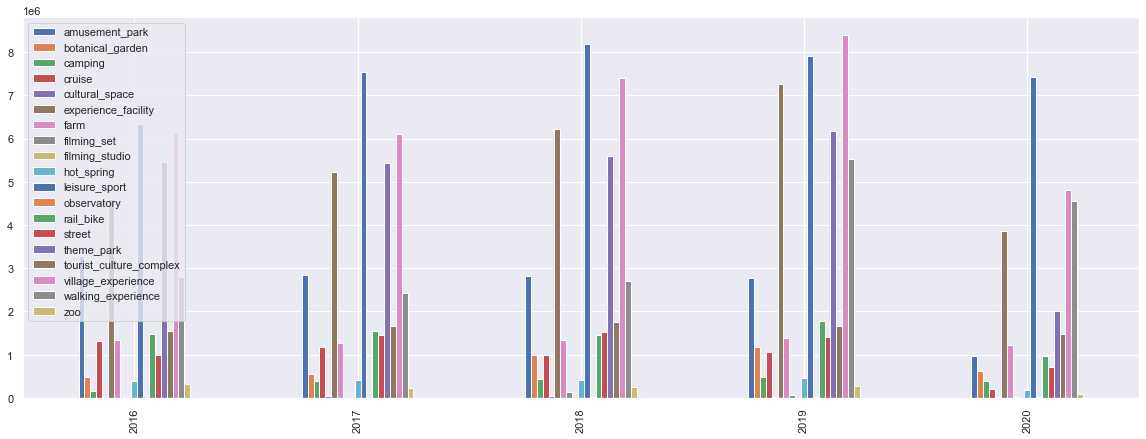

In [51]:
sub_data_cat_exp_total_outdoor5.plot(figsize = (20,7), kind='bar')
plt.legend(loc='upper left');

indoor

In [52]:
sub_data_cat_exp_total_indoor = sub_data_cat_exp_total[sub_data_cat_exp_total.category=='indoor']
sub_data_cat_exp_total_indoor

,tourist_spot_eng,category,sub_category,label,2016,2017,2018,2019,2020
519,National Museum of Korea,indoor,facility,museum,3396259.0,3476606.0,3304453.0,3354089.0,1738008.0
545,Lotte World,indoor,experience,theme_park,NaN,NaN,5692646.0,5786118.0,1557802.0
2608,Meeting Plaza,indoor,etc,etc,151721.0,170256.0,234385.0,636277.0,616135.0
2072,Kangwon Land Casino,indoor,experience,experience_facility,3169656.0,3114948.0,2851889.0,2906934.0,599264.0
3616,Independence (Memorial) Hall,indoor,facility,memorial_hall,1519931.0,1633175.0,1631742.0,1795983.0,594519.0
...,...,...,...,...,...,...,...,...,...
4017,Postal Museum,indoor,facility,museum,NaN,NaN,NaN,NaN,NaN
4044,Lee Dongnyeong Memorial Hall,indoor,facility,memorial_hall,NaN,NaN,NaN,NaN,NaN
4078,Traditional Buddhist Cultural Center,indoor,facility,cultural_space,NaN,NaN,NaN,NaN,NaN
4098,Museum of Natural History Jidang,indoor,facility,museum,NaN,NaN,NaN,NaN,NaN


In [53]:
sub_data_cat_exp_total_indoor2 = sub_data_cat_exp_total_indoor[sub_data_cat_exp_total_indoor.sub_category=='experience']
sub_data_cat_exp_total_indoor2

,tourist_spot_eng,category,sub_category,label,2016,2017,2018,2019,2020
545,Lotte World,indoor,experience,theme_park,NaN,NaN,5692646.0,5786118.0,1557802.0
2072,Kangwon Land Casino,indoor,experience,experience_facility,3169656.0,3114948.0,2851889.0,2906934.0,599264.0
549,Aquarium,indoor,experience,theme_park,NaN,NaN,1290266.0,1268073.0,506012.0
465,Aqua Planet Jeju,indoor,experience,theme_park,1416815.0,1230235.0,995558.0,903687.0,455219.0
810,Apsan Tower,indoor,experience,observatory,300152.0,231032.0,361008.0,345465.0,415058.0
...,...,...,...,...,...,...,...,...,...
3732,Mud Experience Center,indoor,experience,experience_facility,NaN,NaN,NaN,NaN,NaN
3834,Sokdong Observatory,indoor,experience,observatory,NaN,NaN,NaN,NaN,NaN
3912,Asan Hot Spring,indoor,experience,hot_spring,NaN,NaN,NaN,NaN,NaN
3998,Onyang Hot Springs,indoor,experience,hot_spring,NaN,NaN,NaN,NaN,NaN


In [54]:
sub_data_cat_exp_total_indoor3 = sub_data_cat_exp_total_indoor2[['tourist_spot_eng', 'label', '2016', '2017', '2018', '2019', '2020']]
sub_data_cat_exp_total_indoor3

,tourist_spot_eng,label,2016,2017,2018,2019,2020
545,Lotte World,theme_park,NaN,NaN,5692646.0,5786118.0,1557802.0
2072,Kangwon Land Casino,experience_facility,3169656.0,3114948.0,2851889.0,2906934.0,599264.0
549,Aquarium,theme_park,NaN,NaN,1290266.0,1268073.0,506012.0
465,Aqua Planet Jeju,theme_park,1416815.0,1230235.0,995558.0,903687.0,455219.0
810,Apsan Tower,observatory,300152.0,231032.0,361008.0,345465.0,415058.0
...,...,...,...,...,...,...,...
3732,Mud Experience Center,experience_facility,NaN,NaN,NaN,NaN,NaN
3834,Sokdong Observatory,observatory,NaN,NaN,NaN,NaN,NaN
3912,Asan Hot Spring,hot_spring,NaN,NaN,NaN,NaN,NaN
3998,Onyang Hot Springs,hot_spring,NaN,NaN,NaN,NaN,NaN


In [55]:
sub_data_cat_exp_total_indoor4 = sub_data_cat_exp_total_indoor3.groupby('label').agg('sum')
sub_data_cat_exp_total_indoor4

,2016,2017,2018,2019,2020
label,,,,,
camping,174367.0,188194.0,207040.0,116037.0,126191.0
cruise,110069.0,280448.0,206466.0,186369.0,75178.0
experience_facility,5819580.0,6332863.0,6671535.0,8432037.0,2777351.0
hot_spring,3302681.0,3616920.0,3656644.0,3618976.0,1796718.0
leisure_sport,175082.0,184761.0,194546.0,172231.0,76959.0
observatory,1021857.0,1383130.0,2006315.0,2242321.0,1358303.0
theme_park,3634668.0,3592149.0,11594195.0,11999982.0,4166050.0
tourist_culture_complex,979363.0,935302.0,501922.0,651681.0,239360.0


In [56]:
sub_data_cat_exp_total_indoor5 = sub_data_cat_exp_total_indoor4.transpose()
sub_data_cat_exp_total_indoor5

label,camping,cruise,experience_facility,hot_spring,leisure_sport,observatory,theme_park,tourist_culture_complex
2016,174367.0,110069.0,5819580.0,3302681.0,175082.0,1021857.0,3634668.0,979363.0
2017,188194.0,280448.0,6332863.0,3616920.0,184761.0,1383130.0,3592149.0,935302.0
2018,207040.0,206466.0,6671535.0,3656644.0,194546.0,2006315.0,11594195.0,501922.0
2019,116037.0,186369.0,8432037.0,3618976.0,172231.0,2242321.0,11999982.0,651681.0
2020,126191.0,75178.0,2777351.0,1796718.0,76959.0,1358303.0,4166050.0,239360.0


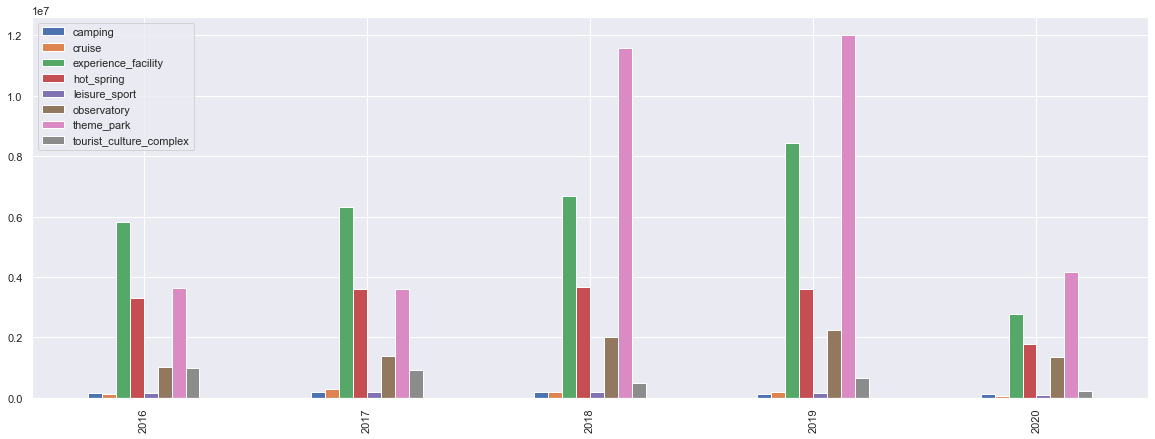

In [57]:
sub_data_cat_exp_total_indoor5.plot(figsize = (20,7), kind='bar')
plt.legend(loc='upper left');

Proportion of indoor and outdoor from sub_category 'experience'

sub_category == 'experience' then category bar graph

In [58]:
p_sub_data_cat_exp_total = sub_data_cat_exp_total[sub_data_cat_exp_total.sub_category=='experience']
p_sub_data_cat_exp_total

,tourist_spot_eng,category,sub_category,label,2016,2017,2018,2019,2020
545,Lotte World,indoor,experience,theme_park,NaN,NaN,5692646.0,5786118.0,1557802.0
234,Gamcheon Culture Village,outdoor,experience,village_experience,1841323.0,2050297.0,2570521.0,3082289.0,1133300.0
1153,Namiseom Island Recreation Area,outdoor,experience,amusement_park,3279929.0,2837581.0,2808819.0,2765111.0,972522.0
1627,Abai Village,outdoor,experience,village_experience,438366.0,545543.0,1007480.0,1120965.0,960477.0
510,Namsangol Hanok Village,outdoor,experience,village_experience,1282840.0,1163995.0,1431737.0,1479195.0,793341.0
...,...,...,...,...,...,...,...,...,...
4120,Cheonan Recreation Tourist Site,outdoor,experience,tourist_culture_complex,NaN,NaN,NaN,NaN,NaN
4179,Taejo Mountain Tourist Site,outdoor,experience,tourist_culture_complex,NaN,NaN,NaN,NaN,NaN
4191,Reptile Insect Experience Center,indoor,experience,experience_facility,NaN,NaN,NaN,NaN,NaN
4235,Herb Paradise,outdoor,experience,experience_facility,NaN,NaN,NaN,NaN,NaN


In [59]:
p_sub_data_cat_exp_total2 = p_sub_data_cat_exp_total[['tourist_spot_eng', 'category', '2016', '2017', '2018', '2019', '2020']]
p_sub_data_cat_exp_total2

,tourist_spot_eng,category,2016,2017,2018,2019,2020
545,Lotte World,indoor,NaN,NaN,5692646.0,5786118.0,1557802.0
234,Gamcheon Culture Village,outdoor,1841323.0,2050297.0,2570521.0,3082289.0,1133300.0
1153,Namiseom Island Recreation Area,outdoor,3279929.0,2837581.0,2808819.0,2765111.0,972522.0
1627,Abai Village,outdoor,438366.0,545543.0,1007480.0,1120965.0,960477.0
510,Namsangol Hanok Village,outdoor,1282840.0,1163995.0,1431737.0,1479195.0,793341.0
...,...,...,...,...,...,...,...
4120,Cheonan Recreation Tourist Site,outdoor,NaN,NaN,NaN,NaN,NaN
4179,Taejo Mountain Tourist Site,outdoor,NaN,NaN,NaN,NaN,NaN
4191,Reptile Insect Experience Center,indoor,NaN,NaN,NaN,NaN,NaN
4235,Herb Paradise,outdoor,NaN,NaN,NaN,NaN,NaN


In [60]:
p_sub_data_cat_exp_total3 = p_sub_data_cat_exp_total2.groupby('category').agg('sum')
p_sub_data_cat_exp_total3

,2016,2017,2018,2019,2020
category,,,,,
indoor,15217667.0,16513767.0,25038663.0,27419634.0,10616110.0
outdoor,36630369.0,38308587.0,42220629.0,47782015.0,29575561.0


In [61]:
p_sub_data_cat_exp_total4 = p_sub_data_cat_exp_total3.transpose()
p_sub_data_cat_exp_total4

category,indoor,outdoor
2016,15217667.0,36630369.0
2017,16513767.0,38308587.0
2018,25038663.0,42220629.0
2019,27419634.0,47782015.0
2020,10616110.0,29575561.0


In [62]:
p_sub_data_cat_exp_total5 = p_sub_data_cat_exp_total4.div(p_sub_data_cat_exp_total4.sum(1), axis=0)
p_sub_data_cat_exp_total5

category,indoor,outdoor
2016,0.293505,0.706495
2017,0.301223,0.698777
2018,0.372271,0.627729
2019,0.364615,0.635385
2020,0.264137,0.735863


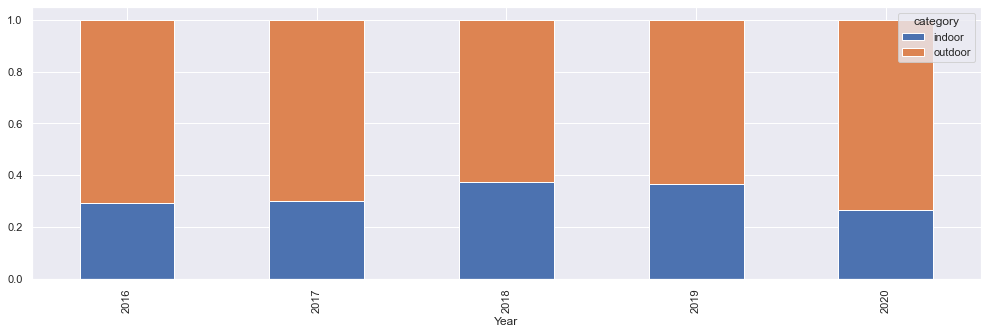

In [63]:
fig, ax = plt.subplots(1,1)
p_sub_data_cat_exp_total5.plot(figsize=(17,5), kind='bar', stacked=True, xlabel='Year', ax=ax);

## 4. Monthly Graph by sub_category

### 4-1. Total Number of Tourists

In [64]:
monthly_data_total_sub = data_total[['tourist_spot_eng', 'sub_category', '2016-Jan', '2016-Feb', '2016-Mar', '2016-Apr', '2016-May', '2016-Jun', '2016-Jul', '2016-Aug', '2016-Sep', '2016-Oct', '2016-Nov', '2016-Dec', '2017-Jan', '2017-Feb', '2017-Mar', '2017-Apr', '2017-May', '2017-Jun', '2017-Jul', '2017-Aug', '2017-Sep', '2017-Oct', '2017-Nov', '2017-Dec', '2018-Jan', '2018-Feb', '2018-Mar', '2018-Apr', '2018-May', '2018-Jun', '2018-Jul', '2018-Aug', '2018-Sep', '2018-Oct', '2018-Nov', '2018-Dec', '2019-Jan', '2019-Feb', '2019-Mar', '2019-Apr', '2019-May', '2019-Jun', '2019-Jul', '2019-Aug', '2019-Sep', '2019-Oct', '2019-Nov', '2019-Dec', '2020-Jan', '2020-Feb', '2020-Mar', '2020-Apr', '2020-May', '2020-Jun', '2020-Jul', '2020-Aug', '2020-Sep', '2020-Oct', '2020-Nov', '2020-Dec', '2021-Jan', '2021-Feb', '2021-Mar', '2021-Apr', '2021-May', '2021-Jun']]
monthly_data_total_sub.head()

,tourist_spot_eng,sub_category,2016-Jan,2016-Feb,2016-Mar,2016-Apr,2016-May,2016-Jun,2016-Jul,2016-Aug,...,2020-Sep,2020-Oct,2020-Nov,2020-Dec,2021-Jan,2021-Feb,2021-Mar,2021-Apr,2021-May,2021-Jun
2,Gas Science Museum,facility,4942.0,2149.0,1597.0,6657.0,7620.0,8410.0,8227.0,5728.0,...,0.0,4527.0,4590.0,698.0,12.0,89.0,844.0,NaN,NaN,NaN
5,Gachon Museum,facility,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,229.0,326.0,92.0,0.0,0.0,105.0,NaN,NaN,NaN
7,Ganghwa Agricultural Culture Center,facility,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
10,Ganghwa Tidalflat Center,experience,NaN,NaN,NaN,NaN,NaN,NaN,887.0,1098.0,...,0.0,60.0,24.0,0.0,0.0,0.0,22.0,NaN,NaN,NaN
13,Ganghwa Dolmen,history_cultural,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
monthly_data_total_sub_agg = monthly_data_total_sub.groupby('sub_category').agg('sum')
monthly_data_total_sub_agg

,2016-Jan,2016-Feb,2016-Mar,2016-Apr,2016-May,2016-Jun,2016-Jul,2016-Aug,2016-Sep,2016-Oct,...,2020-Sep,2020-Oct,2020-Nov,2020-Dec,2021-Jan,2021-Feb,2021-Mar,2021-Apr,2021-May,2021-Jun
sub_category,,,,,,,,,,,,,,,,,,,,,
accommodation,48292.0,52811.0,13813.0,40903.0,39221.0,67429.0,119742.0,168807.0,27326.0,34027.0,...,28966.0,37727.0,28598.0,15951.0,10833.0,20164.0,23986.0,1045.0,1010.0,1095.0
etc,94392.0,104945.0,139733.0,160600.0,246358.0,230986.0,226516.0,226820.0,224290.0,245766.0,...,193835.0,233101.0,191504.0,154013.0,90527.0,100949.0,132747.0,53345.0,59601.0,55716.0
experience,4396567.0,3552611.0,3142208.0,5016918.0,6026006.0,4362451.0,4769742.0,5766482.0,4035845.0,5674723.0,...,2640401.0,4936594.0,3728853.0,1813762.0,900387.0,1603497.0,1610056.0,995994.0,1297060.0,1036367.0
facility,2178345.0,1823929.0,1851142.0,2914569.0,3627807.0,2905578.0,2528996.0,3345675.0,3164725.0,3887127.0,...,342018.0,1446774.0,1381024.0,561529.0,327565.0,611790.0,675066.0,267833.0,380877.0,283577.0
history_cultural,1044417.0,1059138.0,1233249.0,2183042.0,2528430.0,1857565.0,1840179.0,2039867.0,2344888.0,2922185.0,...,988208.0,2125826.0,1621062.0,733006.0,327296.0,482719.0,472495.0,267162.0,301787.0,252523.0
nature,2755774.0,2274388.0,2627309.0,3836127.0,4817325.0,3640779.0,3741305.0,4735663.0,3816215.0,5811124.0,...,2924545.0,5182561.0,3790910.0,2179400.0,962660.0,1224104.0,1338093.0,1018356.0,1249904.0,869149.0


In [66]:
monthly_data_total_sub_agg_trans = monthly_data_total_sub_agg.transpose()
monthly_data_total_sub_agg_trans

sub_category,accommodation,etc,experience,facility,history_cultural,nature
2016-Jan,48292.0,94392.0,4396567.0,2178345.0,1044417.0,2755774.0
2016-Feb,52811.0,104945.0,3552611.0,1823929.0,1059138.0,2274388.0
2016-Mar,13813.0,139733.0,3142208.0,1851142.0,1233249.0,2627309.0
2016-Apr,40903.0,160600.0,5016918.0,2914569.0,2183042.0,3836127.0
2016-May,39221.0,246358.0,6026006.0,3627807.0,2528430.0,4817325.0
...,...,...,...,...,...,...
2021-Feb,20164.0,100949.0,1603497.0,611790.0,482719.0,1224104.0
2021-Mar,23986.0,132747.0,1610056.0,675066.0,472495.0,1338093.0
2021-Apr,1045.0,53345.0,995994.0,267833.0,267162.0,1018356.0
2021-May,1010.0,59601.0,1297060.0,380877.0,301787.0,1249904.0


In [67]:
monthly_data_total_sub_agg_trans.index = pd.to_datetime(monthly_data_total_sub_agg_trans.index)

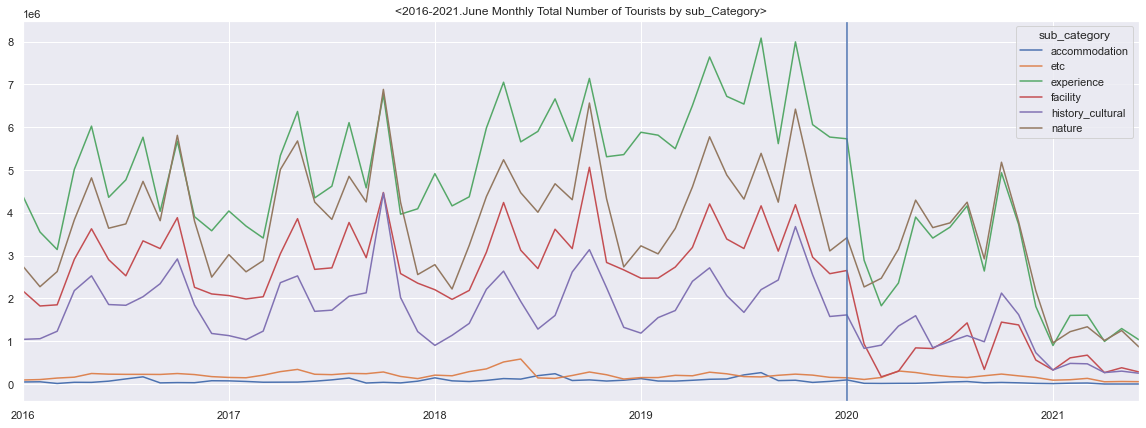

In [68]:
ax = monthly_data_total_sub_agg_trans.plot(figsize = (20,7), kind='line', title='<2016-2021.June Monthly Total Number of Tourists by sub_Category>')
ax.axvline(x='2020-Jan', label='COVID-19');

In [69]:
monthly_data_total_sub_agg2_trans = monthly_data_total_sub_agg.transpose()
monthly_data_total_sub_agg2_trans

sub_category,accommodation,etc,experience,facility,history_cultural,nature
2016-Jan,48292.0,94392.0,4396567.0,2178345.0,1044417.0,2755774.0
2016-Feb,52811.0,104945.0,3552611.0,1823929.0,1059138.0,2274388.0
2016-Mar,13813.0,139733.0,3142208.0,1851142.0,1233249.0,2627309.0
2016-Apr,40903.0,160600.0,5016918.0,2914569.0,2183042.0,3836127.0
2016-May,39221.0,246358.0,6026006.0,3627807.0,2528430.0,4817325.0
...,...,...,...,...,...,...
2021-Feb,20164.0,100949.0,1603497.0,611790.0,482719.0,1224104.0
2021-Mar,23986.0,132747.0,1610056.0,675066.0,472495.0,1338093.0
2021-Apr,1045.0,53345.0,995994.0,267833.0,267162.0,1018356.0
2021-May,1010.0,59601.0,1297060.0,380877.0,301787.0,1249904.0


In [70]:
monthly_data_total_sub_agg2_trans.reset_index(inplace=True)
monthly_data_total_sub_agg2_trans

sub_category,index,accommodation,etc,experience,facility,history_cultural,nature
0,2016-Jan,48292.0,94392.0,4396567.0,2178345.0,1044417.0,2755774.0
1,2016-Feb,52811.0,104945.0,3552611.0,1823929.0,1059138.0,2274388.0
2,2016-Mar,13813.0,139733.0,3142208.0,1851142.0,1233249.0,2627309.0
3,2016-Apr,40903.0,160600.0,5016918.0,2914569.0,2183042.0,3836127.0
4,2016-May,39221.0,246358.0,6026006.0,3627807.0,2528430.0,4817325.0
...,...,...,...,...,...,...,...
61,2021-Feb,20164.0,100949.0,1603497.0,611790.0,482719.0,1224104.0
62,2021-Mar,23986.0,132747.0,1610056.0,675066.0,472495.0,1338093.0
63,2021-Apr,1045.0,53345.0,995994.0,267833.0,267162.0,1018356.0
64,2021-May,1010.0,59601.0,1297060.0,380877.0,301787.0,1249904.0


In [71]:
monthly_data_total_sub_agg2_trans_melt = monthly_data_total_sub_agg2_trans.melt(id_vars = ['index'])
monthly_data_total_sub_agg2_trans_melt

,index,sub_category,value
0,2016-Jan,accommodation,48292.0
1,2016-Feb,accommodation,52811.0
2,2016-Mar,accommodation,13813.0
3,2016-Apr,accommodation,40903.0
4,2016-May,accommodation,39221.0
...,...,...,...
391,2021-Feb,nature,1224104.0
392,2021-Mar,nature,1338093.0
393,2021-Apr,nature,1018356.0
394,2021-May,nature,1249904.0


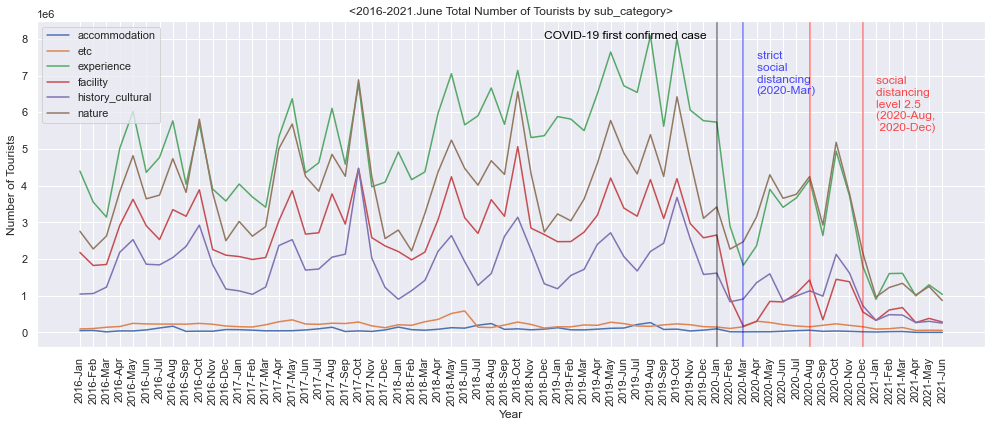

In [72]:
sns.set(rc={'figure.figsize':(17,6)})
ax = sns.lineplot(data = monthly_data_total_sub_agg2_trans_melt, x='index', y='value', hue='sub_category')
ax.set(xlabel='Year', ylabel='Number of Tourists', title='<2016-2021.June Total Number of Tourists by sub_category>')
ax.tick_params(axis='x', rotation=90)
plt.legend(loc='upper left')
plt.axvline('2020-Jan', color='black', alpha=0.5)
plt.text('2018-Dec',8000000,'COVID-19 first confirmed case', color='black')
plt.axvline('2020-Mar', color='blue',alpha=0.5)
plt.text('2020-Apr',6500000,'strict \nsocial \ndistancing \n(2020-Mar)', color='blue', alpha=0.7)
plt.axvline('2020-Aug', color='red',alpha=0.5)
plt.text('2021-Jan',5500000,'social \ndistancing \nlevel 2.5 \n(2020-Aug, \n 2020-Dec)', color='red', alpha=0.7)
plt.axvline('2020-Dec', color='red',alpha=0.5);

### 4-2. Foreigner vs. Local

Data for locals and foreigners

In [73]:
data_no_total = data_no_korean[(data_no_korean.foreigner_local == 'Local') | (data_no_korean.foreigner_local == 'Foreigner')]
data_no_total.head(3)

,province,district,category,sub_category,label,tourist_spot_eng,foreigner_local,2012-Jan,2012-Feb,2012-Mar,...,2020-Sep,2020-Oct,2020-Nov,2020-Dec,2021-Jan,2021-Feb,2021-Mar,2021-Apr,2021-May,2021-Jun
0,Incheon Metropolitan City,Yeonsu-gu,indoor,facility,museum,Gas Science Museum,Foreigner,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,Incheon Metropolitan City,Yeonsu-gu,indoor,facility,museum,Gas Science Museum,Local,4303.0,2089.0,567.0,...,0.0,4527.0,4590.0,698.0,12.0,89.0,844.0,NaN,NaN,NaN
3,Incheon Metropolitan City,Yeonsu-gu,indoor,facility,museum,Gachon Museum,Foreigner,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [74]:
data_no_total_sub = data_no_total[['tourist_spot_eng','sub_category', 'foreigner_local', '2016-Jan', '2016-Feb', '2016-Mar', '2016-Apr', '2016-May', '2016-Jun', '2016-Jul', '2016-Aug', '2016-Sep', '2016-Oct', '2016-Nov', '2016-Dec', '2017-Jan', '2017-Feb', '2017-Mar', '2017-Apr', '2017-May', '2017-Jun', '2017-Jul', '2017-Aug', '2017-Sep', '2017-Oct', '2017-Nov', '2017-Dec', '2018-Jan', '2018-Feb', '2018-Mar', '2018-Apr', '2018-May', '2018-Jun', '2018-Jul', '2018-Aug', '2018-Sep', '2018-Oct', '2018-Nov', '2018-Dec', '2019-Jan', '2019-Feb', '2019-Mar', '2019-Apr', '2019-May', '2019-Jun', '2019-Jul', '2019-Aug', '2019-Sep', '2019-Oct', '2019-Nov', '2019-Dec', '2020-Jan', '2020-Feb', '2020-Mar', '2020-Apr', '2020-May', '2020-Jun', '2020-Jul', '2020-Aug', '2020-Sep', '2020-Oct', '2020-Nov', '2020-Dec', '2021-Jan', '2021-Feb', '2021-Mar', '2021-Apr', '2021-May', '2021-Jun']]
data_no_total_sub.head()

,tourist_spot_eng,sub_category,foreigner_local,2016-Jan,2016-Feb,2016-Mar,2016-Apr,2016-May,2016-Jun,2016-Jul,...,2020-Sep,2020-Oct,2020-Nov,2020-Dec,2021-Jan,2021-Feb,2021-Mar,2021-Apr,2021-May,2021-Jun
0,Gas Science Museum,facility,Foreigner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,Gas Science Museum,facility,Local,4942.0,2149.0,1597.0,6657.0,7620.0,8410.0,8227.0,...,0.0,4527.0,4590.0,698.0,12.0,89.0,844.0,NaN,NaN,NaN
3,Gachon Museum,facility,Foreigner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,Gachon Museum,facility,Local,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,229.0,326.0,92.0,0.0,0.0,105.0,NaN,NaN,NaN
6,Ganghwa Agricultural Culture Center,facility,Local,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


#### only Local

In [75]:
data_no_total_sub_local = data_no_total_sub[data_no_total_sub.foreigner_local=='Local']
data_no_total_sub_local.head()

,tourist_spot_eng,sub_category,foreigner_local,2016-Jan,2016-Feb,2016-Mar,2016-Apr,2016-May,2016-Jun,2016-Jul,...,2020-Sep,2020-Oct,2020-Nov,2020-Dec,2021-Jan,2021-Feb,2021-Mar,2021-Apr,2021-May,2021-Jun
1,Gas Science Museum,facility,Local,4942.0,2149.0,1597.0,6657.0,7620.0,8410.0,8227.0,...,0.0,4527.0,4590.0,698.0,12.0,89.0,844.0,NaN,NaN,NaN
4,Gachon Museum,facility,Local,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,229.0,326.0,92.0,0.0,0.0,105.0,NaN,NaN,NaN
6,Ganghwa Agricultural Culture Center,facility,Local,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
9,Ganghwa Tidalflat Center,experience,Local,NaN,NaN,NaN,NaN,NaN,NaN,887.0,...,0.0,60.0,24.0,0.0,0.0,0.0,22.0,NaN,NaN,NaN
12,Ganghwa Dolmen,history_cultural,Local,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
data_no_total_sub_local_agg = data_no_total_sub_local.groupby('sub_category').agg('sum')
data_no_total_sub_local_agg

,2016-Jan,2016-Feb,2016-Mar,2016-Apr,2016-May,2016-Jun,2016-Jul,2016-Aug,2016-Sep,2016-Oct,...,2020-Sep,2020-Oct,2020-Nov,2020-Dec,2021-Jan,2021-Feb,2021-Mar,2021-Apr,2021-May,2021-Jun
sub_category,,,,,,,,,,,,,,,,,,,,,
accommodation,48219.0,52663.0,13643.0,38438.0,37008.0,66552.0,119672.0,167936.0,26649.0,32329.0,...,28966.0,37727.0,28598.0,15951.0,10833.0,20164.0,23986.0,1045.0,1010.0,1095.0
etc,94392.0,104945.0,139733.0,160600.0,246358.0,230986.0,226516.0,226820.0,224290.0,245766.0,...,193835.0,233101.0,191504.0,154013.0,90527.0,100949.0,132747.0,53345.0,59601.0,55716.0
experience,4218854.0,3362662.0,2924242.0,4721905.0,5770034.0,4114735.0,4490893.0,5514004.0,3822683.0,5354405.0,...,2638705.0,4930506.0,3723034.0,1812436.0,899381.0,1599722.0,1608129.0,995785.0,1296873.0,1036231.0
facility,2109115.0,1746921.0,1750002.0,2819227.0,3523985.0,2805061.0,2427229.0,3232115.0,3082147.0,3801248.0,...,341763.0,1443145.0,1377272.0,558510.0,327047.0,609832.0,673085.0,267726.0,380716.0,283425.0
history_cultural,806654.0,800453.0,938199.0,1759160.0,2123774.0,1495515.0,1402743.0,1677717.0,2043302.0,2564779.0,...,984908.0,2116088.0,1612673.0,730719.0,326540.0,481041.0,470999.0,266821.0,301444.0,252269.0
nature,2629927.0,2110835.0,2448013.0,3621613.0,4602573.0,3410017.0,3448654.0,4483863.0,3626900.0,5599009.0,...,2910410.0,5177619.0,3788663.0,2178150.0,962660.0,1223938.0,1338085.0,1018356.0,1249904.0,869136.0


In [77]:
data_no_total_sub_local_agg_trans = data_no_total_sub_local_agg.transpose()
data_no_total_sub_local_agg_trans

sub_category,accommodation,etc,experience,facility,history_cultural,nature
2016-Jan,48219.0,94392.0,4218854.0,2109115.0,806654.0,2629927.0
2016-Feb,52663.0,104945.0,3362662.0,1746921.0,800453.0,2110835.0
2016-Mar,13643.0,139733.0,2924242.0,1750002.0,938199.0,2448013.0
2016-Apr,38438.0,160600.0,4721905.0,2819227.0,1759160.0,3621613.0
2016-May,37008.0,246358.0,5770034.0,3523985.0,2123774.0,4602573.0
...,...,...,...,...,...,...
2021-Feb,20164.0,100949.0,1599722.0,609832.0,481041.0,1223938.0
2021-Mar,23986.0,132747.0,1608129.0,673085.0,470999.0,1338085.0
2021-Apr,1045.0,53345.0,995785.0,267726.0,266821.0,1018356.0
2021-May,1010.0,59601.0,1296873.0,380716.0,301444.0,1249904.0


In [78]:
data_no_total_sub_local_agg_trans.reset_index(inplace=True)
data_no_total_sub_local_agg_trans

sub_category,index,accommodation,etc,experience,facility,history_cultural,nature
0,2016-Jan,48219.0,94392.0,4218854.0,2109115.0,806654.0,2629927.0
1,2016-Feb,52663.0,104945.0,3362662.0,1746921.0,800453.0,2110835.0
2,2016-Mar,13643.0,139733.0,2924242.0,1750002.0,938199.0,2448013.0
3,2016-Apr,38438.0,160600.0,4721905.0,2819227.0,1759160.0,3621613.0
4,2016-May,37008.0,246358.0,5770034.0,3523985.0,2123774.0,4602573.0
...,...,...,...,...,...,...,...
61,2021-Feb,20164.0,100949.0,1599722.0,609832.0,481041.0,1223938.0
62,2021-Mar,23986.0,132747.0,1608129.0,673085.0,470999.0,1338085.0
63,2021-Apr,1045.0,53345.0,995785.0,267726.0,266821.0,1018356.0
64,2021-May,1010.0,59601.0,1296873.0,380716.0,301444.0,1249904.0


In [79]:
data_no_total_sub_local_agg_trans_melt = data_no_total_sub_local_agg_trans.melt(id_vars=['index'])
data_no_total_sub_local_agg_trans_melt

,index,sub_category,value
0,2016-Jan,accommodation,48219.0
1,2016-Feb,accommodation,52663.0
2,2016-Mar,accommodation,13643.0
3,2016-Apr,accommodation,38438.0
4,2016-May,accommodation,37008.0
...,...,...,...
391,2021-Feb,nature,1223938.0
392,2021-Mar,nature,1338085.0
393,2021-Apr,nature,1018356.0
394,2021-May,nature,1249904.0


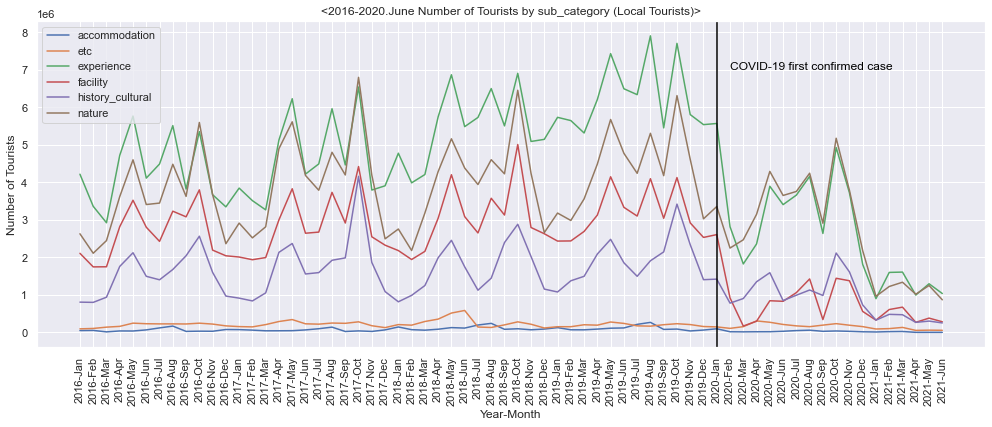

In [81]:
sns.set(rc={'figure.figsize':(17,6)})
ax = sns.lineplot(data = data_no_total_sub_local_agg_trans_melt, x='index', y='value', hue='sub_category')
ax.set(xlabel='Year-Month', ylabel='Number of Tourists', title='<2016-2020.June Number of Tourists by sub_category (Local Tourists)>')
ax.tick_params(axis='x', rotation=90)
plt.legend(loc='upper left')
plt.axvline('2020-Jan', color='black')
plt.text('2020-Feb',7000000,'COVID-19 first confirmed case', color='black');

only Foreigner

In [82]:
data_no_total_sub_foreigner = data_no_total_sub[data_no_total_sub.foreigner_local=='Foreigner']
data_no_total_sub_foreigner.head()

,tourist_spot_eng,sub_category,foreigner_local,2016-Jan,2016-Feb,2016-Mar,2016-Apr,2016-May,2016-Jun,2016-Jul,...,2020-Sep,2020-Oct,2020-Nov,2020-Dec,2021-Jan,2021-Feb,2021-Mar,2021-Apr,2021-May,2021-Jun
0,Gas Science Museum,facility,Foreigner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3,Gachon Museum,facility,Foreigner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
8,Ganghwa Tidalflat Center,experience,Foreigner,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
11,Ganghwa Dolmen,history_cultural,Foreigner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,Ganghwa History Museum,facility,Foreigner,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [83]:
data_no_total_sub_foreigner_agg = data_no_total_sub_foreigner.groupby('sub_category').agg('sum')
data_no_total_sub_foreigner_agg.head()

,2016-Jan,2016-Feb,2016-Mar,2016-Apr,2016-May,2016-Jun,2016-Jul,2016-Aug,2016-Sep,2016-Oct,...,2020-Sep,2020-Oct,2020-Nov,2020-Dec,2021-Jan,2021-Feb,2021-Mar,2021-Apr,2021-May,2021-Jun
sub_category,,,,,,,,,,,,,,,,,,,,,
accommodation,73.0,148.0,170.0,2465.0,2213.0,877.0,70.0,871.0,677.0,1698.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
etc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
experience,177713.0,189949.0,217966.0,295013.0,255972.0,247716.0,278849.0,252478.0,213162.0,320318.0,...,1696.0,6088.0,5819.0,1326.0,1006.0,3775.0,1927.0,209.0,187.0,136.0
facility,69230.0,77008.0,101140.0,95342.0,103822.0,100517.0,101767.0,113560.0,82578.0,85879.0,...,255.0,3629.0,3752.0,3019.0,518.0,1958.0,1981.0,107.0,161.0,152.0
history_cultural,237763.0,258685.0,295050.0,423882.0,404656.0,362050.0,437436.0,362150.0,301586.0,357406.0,...,3300.0,9738.0,8389.0,2287.0,756.0,1678.0,1496.0,341.0,343.0,254.0


In [84]:
data_no_total_sub_foreigner_agg_trans = data_no_total_sub_foreigner_agg.transpose()
data_no_total_sub_foreigner_agg_trans

sub_category,accommodation,etc,experience,facility,history_cultural,nature
2016-Jan,73.0,0.0,177713.0,69230.0,237763.0,125847.0
2016-Feb,148.0,0.0,189949.0,77008.0,258685.0,163553.0
2016-Mar,170.0,0.0,217966.0,101140.0,295050.0,179296.0
2016-Apr,2465.0,0.0,295013.0,95342.0,423882.0,214514.0
2016-May,2213.0,0.0,255972.0,103822.0,404656.0,214752.0
...,...,...,...,...,...,...
2021-Feb,0.0,0.0,3775.0,1958.0,1678.0,166.0
2021-Mar,0.0,0.0,1927.0,1981.0,1496.0,8.0
2021-Apr,0.0,0.0,209.0,107.0,341.0,0.0
2021-May,0.0,0.0,187.0,161.0,343.0,0.0


In [85]:
data_no_total_sub_foreigner_agg_trans.reset_index(inplace=True)
data_no_total_sub_foreigner_agg_trans

sub_category,index,accommodation,etc,experience,facility,history_cultural,nature
0,2016-Jan,73.0,0.0,177713.0,69230.0,237763.0,125847.0
1,2016-Feb,148.0,0.0,189949.0,77008.0,258685.0,163553.0
2,2016-Mar,170.0,0.0,217966.0,101140.0,295050.0,179296.0
3,2016-Apr,2465.0,0.0,295013.0,95342.0,423882.0,214514.0
4,2016-May,2213.0,0.0,255972.0,103822.0,404656.0,214752.0
...,...,...,...,...,...,...,...
61,2021-Feb,0.0,0.0,3775.0,1958.0,1678.0,166.0
62,2021-Mar,0.0,0.0,1927.0,1981.0,1496.0,8.0
63,2021-Apr,0.0,0.0,209.0,107.0,341.0,0.0
64,2021-May,0.0,0.0,187.0,161.0,343.0,0.0


In [86]:
data_no_total_sub_foreigner_agg_trans_melt = data_no_total_sub_foreigner_agg_trans.melt(id_vars=['index'])
data_no_total_sub_foreigner_agg_trans_melt

,index,sub_category,value
0,2016-Jan,accommodation,73.0
1,2016-Feb,accommodation,148.0
2,2016-Mar,accommodation,170.0
3,2016-Apr,accommodation,2465.0
4,2016-May,accommodation,2213.0
...,...,...,...
391,2021-Feb,nature,166.0
392,2021-Mar,nature,8.0
393,2021-Apr,nature,0.0
394,2021-May,nature,0.0


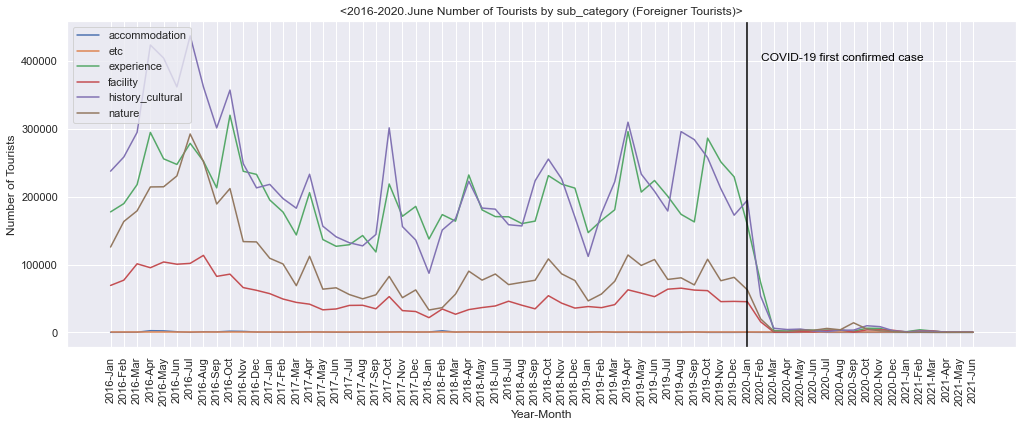

In [92]:
sns.set(rc={'figure.figsize':(17,6)})
ax = sns.lineplot(data = data_no_total_sub_foreigner_agg_trans_melt, x='index', y='value', hue='sub_category')
ax.set(xlabel='Year-Month', ylabel='Number of Tourists', title='<2016-2020.June Number of Tourists by sub_category (Foreigner Tourists)>')
ax.tick_params(axis='x', rotation=90)
plt.legend(loc='upper left')
plt.axvline('2020-Jan', color='black')
plt.text('2020-Feb',400000,'COVID-19 first confirmed case', color='black');